# Predicting Clinical Trial Terminations
### Notebook 3: Baseline Modelling

**Author: Clement Chan**

---
Notes on the notebook:
- We will initiate a baseline classification model with the dummy variables made from the previous notebook.
- Using a basic logistic regression, we can obtain accuracy scores based on the predictions.
- Evaluation metrics for each model will include a confusion matrix and a classification report to analyze precision and recall scores.

### Data Dictionary for this notebook that is based on clinicaltrials.gov:

---

| Column | Description                                  |Data Type|
|-------|--------------------------------------------|-------|
| Study Title | Title of the Clinical Trial           | object |
| Study Status | Binary column, 0 for Completed Trials and 1 for Terminated Trials | int |
| Brief Summary | Short description of the clinical study (Includes study hypothesis) | object |
| Study Results | Whether the results are posted (yes = 1 or no = 0) | int|
| Conditions | Primary Disease or Condition being studied     | object |
| Interventions | The methods used in the trial to reach the outcome                 | object |
| Primary Outcome Measures | Description of specific primary outcome | object |
| Secondary Outcome Measures | Description of specific secondary outcome | object |
| Sponsor | The corporation or agency that initiates the study | object |
| Collaborators | Other organizations that provide support | object |
| Sex | All: No limit on eligibility based on sex, Male: Only male participants, Female: Only female participants | int |
| Age | Age group of participants: ADULT, OLDER_ADULT, CHILD  | int |
| Phases | Clinical trial phase of the study | int |
| Enrollment | Total number of participants in a study | int |
| Funder Type | Government, Industry, or Other | int |
| Study Type | Interventional = 1, Observational = 0 | int |
| Study Design | Study design based on study type | object |
| Start Date | Estimated/Actual date the first participant was enrolled | datetime |
| Primary Completion Date | Date the final participant was examined for the first outcome | datetime |
| Completion Date | Date the final participant was examined | datetime |
| Locations | Where the clinical study will be held | object |

**Importing Libraries**

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# dividing the data
from sklearn.model_selection import train_test_split

# scalars
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# feature selection
from sklearn.feature_selection import SelectKBest, f_classif

# Text data extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# model metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, f1_score, RocCurveDisplay

# ignores the filter warnings
import warnings
warnings.filterwarnings('ignore')

<a id = 'toc'><a/>
## Table of Contents

---
1. [Baseline Modelling](#base)
2. [Text Preprocessing - Part 1](#text_prep)
3. [Dealing with Data Imbalance](#balance)
4. [Summary & Next Steps](#sum)


<a id = 'blah'></a>
## 1. Baseline Modelling

---
**Load the dataset**

In [2]:
# # Using Google Collab
# from google.colab import drive
# drive.mount('/content/gdrive')#Directory where Google Drive is mounted within the Colab environment.

# # creating DataFrame
# df=pd.read_csv('gdrive/My Drive/data/model_ctg.csv', index_col = 0)
# df.head()

In [2]:
# Using Jupyter notebook
df = pd.read_csv('model_ctg.csv', index_col = 0)

# First 5 rows of dataset
df.head()

,Study Status,Study Results,Study Type,Sex_ALL,Sex_FEMALE,Sex_MALE,Age_ADULT,Age_CHILD,Age_OLDER_ADULT,Phases_EARLY_PHASE1,...,Duration(days)__0-122,Duration(days)__123-244,Duration(days)__245-365,Duration(days)__366-515,Duration(days)__516-671,Duration(days)__672-861,Duration(days)__862-1097,Duration(days)__1098-1460,Duration(days)__1461-2049,Duration(days)__2050-38562
0,0,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2,1,0,1,1,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,1,1,1,0,0,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0


Let's look at the shape of the dataframe.

In [4]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 305110 rows and 228 columns.


**Baseline Model - Logistic Regression**

First we will start with a basic Logistic Regression as our baseline model classifier to determine the accuracy of the predictions and then the f1 score metrics. We will need to scale the data since Logistic Regression is a linear model and unscaled distances can impact the results greatly.

1. Select the independant and dependant variables
2. Divide the dataset into training and testing sets
3. Scale the data using StandardScaler()
4. Fit the LogisticRegression() model
5. Analyze the model results by comparing accuracy, precision, and recall

In [3]:
# setting independant and dependant variables
X = df.drop(columns='Study Status')
y = df['Study Status']

In [4]:
# dividing the data with 20% test size with random state of 12
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12, stratify=y)

# sanity check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(244088, 227) (61022, 227) (244088,) (61022,)


**Standard Scaler**

In [7]:
# instantiate scaler
ss = StandardScaler()

# fit the scaler
ss.fit(X_train)

# transform
X_train_ss = ss.transform(X_train)
X_test_ss = ss.transform(X_test)

**Logistic Regression**

In [8]:
# Instantiate Logreg
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train_ss, y_train)

# find the scores
print(f'Training Score: {logreg.score(X_train_ss, y_train)}')
print(f'Testing score: {logreg.score(X_test_ss, y_test)}')

Training Score: 0.9073489888892531
Testing score: 0.9070171413588541


Just from the basic logistic regression, we are getting a high accuract of 90.7% from both training and test scores. There doesn't seem to be any overfitting so regularization is not required for now. Next we should look into the confusion matrix and evaluate the model.

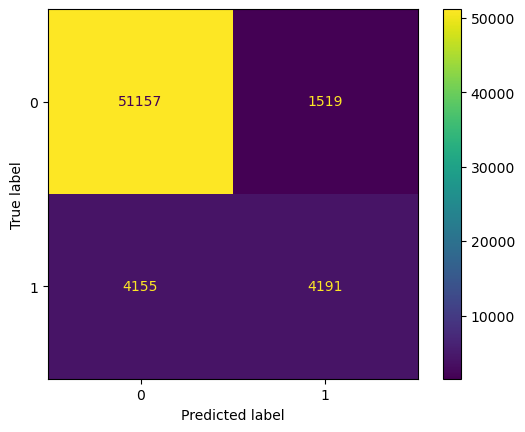

In [9]:
# Get class predictions
y_pred = logreg.predict(X_test_ss)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_ss, y_test)

The logistic regression model is very good at classifying the **True Negatives** or the actual completed trials, but seems to be missing a lot of predictions in the **True Positive** or the actual terminated trials. Let's look at this further in a classification report.

In [10]:
base_logreg_report = classification_report(y_test, y_pred)
print(base_logreg_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52676
           1       0.73      0.50      0.60      8346

    accuracy                           0.91     61022
   macro avg       0.83      0.74      0.77     61022
weighted avg       0.90      0.91      0.90     61022



The recall scores are the actual labels that the model correctly predicted, and we can see that the model is very bad at classifying class 1 or the terminated trials. So out of 8346 terminated trials, the model only classified 50% of actual terminated trials. On the other hand, precision scores measure how many terminated trials the model correctly predicted which is 73%. The **f1-score** is a metric that looks into the harmonic mean between precision and recall which is a good indicator of how the model is performing.

**Selecting Best Features with KBest**

From our dataframe, there are 228 columns or independent variables which is a crazy amount and is difficult to see what variable has the largest impact on predicting terminated trials. We will use SelectKBest() with f_classifier which returns the F-statistic of ANOVA. In simpler words, we will be comparing the variances of each independent variable with the dependent variable and determine what independent variables has the most significant effect on the dependent variable.

SelectKBest notes:
- We will look at different k-values and see how that affects the logistic regression accuracy
- Let's look at a range of 15-30 with a stepsize of 5 and plot the accuracies on a line graph

In [11]:
# creating score lists for graphing
train_scores = []
test_scores = []


ks = list(range(15, 35, 5))

for k in ks:

    # Select your features based on K best
    my_Kbest = SelectKBest(f_classif, k=k).fit(X_train, y_train)

    # Transform to get K Best Features
    X_train_selected = my_Kbest.transform(X_train)
    X_test_selected = my_Kbest.transform(X_test)
    p_value = my_Kbest.pvalues_



    # Create the model on the transformed data
    model = LogisticRegression()
    model.fit(X_train_selected, y_train)


    print(f"k={k}")
    print(f"Best variables: {np.array(my_Kbest.get_feature_names_out())}")
    print("")

    print("p-values", p_value[my_Kbest.get_support()])

    print("-----------------------------------------------------------------")
    print("")

    train_scores.append(model.score(X_train_selected, y_train))
    test_scores.append(model.score(X_test_selected, y_test))


k=15
Best variables: ['Study Type' 'Age_OLDER_ADULT' 'Phases_NO PHASE' 'Phases_PHASE2'
 'Enrollment__0-8' 'Enrollment__20-29' 'Enrollment__30-41'
 'Enrollment__42-59' 'Enrollment__60-79' 'Enrollment__80-119'
 'Enrollment__120-209' 'Enrollment__210-490' 'Enrollment__491-188814085'
 'Country_Egypt' 'Country_United States']

p-values [8.98079445e-185 3.58502650e-270 0.00000000e+000 0.00000000e+000
 0.00000000e+000 4.89377323e-091 8.60352116e-163 4.94065646e-324
 1.36555950e-259 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 9.68623171e-117 0.00000000e+000]
-----------------------------------------------------------------

k=20
Best variables: ['Study Type' 'Age_CHILD' 'Age_OLDER_ADULT' 'Phases_NO PHASE'
 'Phases_PHASE2' 'Enrollment__0-8' 'Enrollment__20-29' 'Enrollment__30-41'
 'Enrollment__42-59' 'Enrollment__60-79' 'Enrollment__80-119'
 'Enrollment__120-209' 'Enrollment__210-490' 'Enrollment__491-188814085'
 'Country_China' 'Country_Egypt' 'Country_Pakistan'
 'Country_

All of the variables listed have extremely low pvalues which indicates that they are very significant in classifying the dependent variable.

Let's look at the logistic regression train and test accuracies:

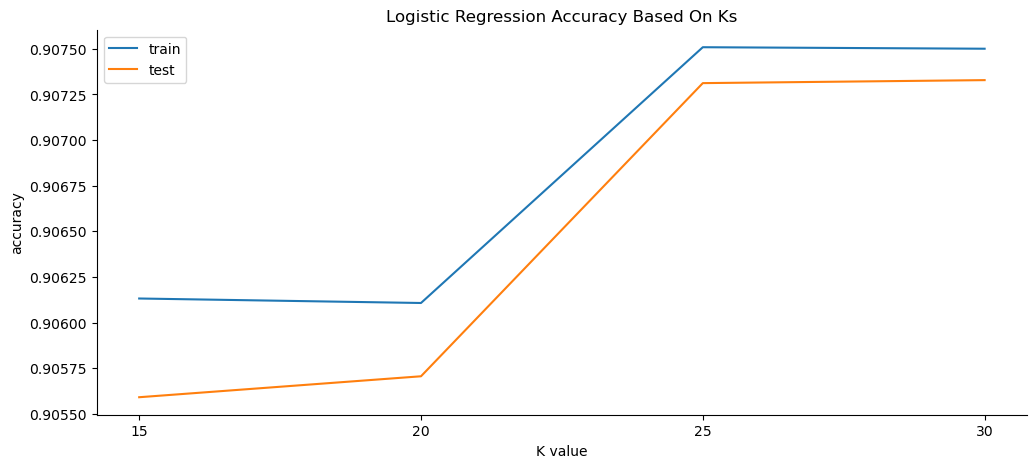

In [12]:
plt.figure(figsize=(12,5))

plt.plot(ks, train_scores, label="train")
plt.plot(ks, test_scores, label="test")
plt.title("Logistic Regression Accuracy based on ks".title())
plt.xlabel("K value")
plt.ylabel("accuracy")
plt.xticks(ks)
plt.legend()

sns.despine()
plt.show()

When looking at k values, the scores of both train and test sets did not change that significantly, only by 0.01% when increased from 20 to 25. It is important to note that the recall scores is still the main problem when evaluating these models.

<a id = 'text_prep'></a>
### 2. Text Preprocessing

[back to table of contents](#toc)

---

One of our main objectives is to find associated factors with trial terminations. We will look into the text columns of the clinical trials dataset and pull out meaningful words using NLP and then add it to the baseline model.

In [5]:
text_df = pd.read_csv('clean_ctg.csv', index_col = 0)
text_df.head()

,Study Title,Study Status,Brief Summary,Study Results,Conditions,Interventions,Primary Outcome Measures,Secondary Outcome Measures,Sponsor,Collaborators,Sex,Age,Phases,Enrollment,Funder Type,Study Type,Study Design,Locations,study_duration
0,Effectiveness of a Problem-solving Interventio...,0,We will conduct a two-arm individually randomi...,0,"Mental Health Issue (E.G., Depression, Psychos...",behavioral: pride 'step 1' problem-solving int...,"Mental health symptoms, The Strengths and Diff...","Mental health symptoms, The adolescent-reporte...",Sangath,Harvard Medical School (HMS and HSDM)|London S...,ALL,"CHILD, ADULT",NO PHASE,210-490,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"Sangath, New Delhi, Delhi, 110016, India",123-244
1,Investigating the Effect of a Prenatal Family ...,0,The purpose of this study is to measure the di...,0,Focus: Contraceptive Counseling|Focus: Postpar...,other: family planning counseling let by commu...,"Self-reported contraceptive use, 6 months post...","Intent to use contraception in the future, 6 m...",Planned Parenthood League of Massachusetts,Society for Family Planning Research Fund,FEMALE,"CHILD, ADULT, OLDER_ADULT",NO PHASE,120-209,OTHER,1,Allocation: NON_RANDOMIZED|Intervention Model:...,Palestinian Ministry of Health Maternal Child ...,366-515
2,Pre-exposure Prophylaxis (PrEP) for People Who...,1,People who inject drugs (PWID) experience high...,0,Intravenous Drug Abuse,behavioral: prep uptake/adherence intervention...,"PrEP uptake by self-report, measured using 1 i...",Participant satisfaction with intervention con...,Boston University,National Institute on Drug Abuse (NIDA),ALL,"ADULT, OLDER_ADULT",NO PHASE,0-8,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,unknown,245-365
3,Tailored Inhibitory Control Training to Revers...,0,Insufficient inhibitory control is one pathway...,0,Smoking|Alcohol Drinking|Prescription Drug Abu...,behavioral: person-centered inhibitory control...,"Inhibitory control performance, Task 1, Perfor...",Far transfer to a task related to inhibitory c...,University of Oregon,none,ALL,ADULT,NO PHASE,80-119,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"University of Oregon, Social and Affective Neu...",516-671
4,Neuromodulation of Trauma Memories in PTSD & A...,0,The purpose of this study is to examine the ef...,1,Alcohol Dependence|PTSD,drug: propranolol|drug: placebo,"Retrieval Session Distress Scores (Session 1),...","Proportion of Drinking Days, Proportion of dri...",Medical University of South Carolina,National Institute on Alcohol Abuse and Alcoho...,ALL,"ADULT, OLDER_ADULT",PHASE2,42-59,OTHER,1,Allocation: RANDOMIZED|Intervention Model: PAR...,"MUSC, Charleston, South Carolina, 294258908, U...",862-1097


In [14]:
print(f'The dataset has {text_df.shape[0]} rows and {text_df.shape[1]} columns.')

The dataset has 305110 rows and 19 columns.


#### Study Title

- We will start with the `Study Title` since it holds the most valuable words in identifying a study.
- Since most of the clinical words are unique to each study, we should give more weight to less frequent words in each document. We will use the TF-IDF vectorizer which will inverse the number of documents a given token appears in. This will make less frequent words more important when classifying trial terminations.

In [6]:
# Setting variables
X_title = text_df['Study Title']
y = text_df['Study Status']

In [7]:
# Splitting text dataset
title_train, title_test, y_train, y_test = train_test_split(X_title, y, test_size=0.2, random_state=12, stratify=y)

# check the shape
print(title_train.shape, title_test.shape, y_train.shape, y_test.shape)

(244088,) (61022,) (244088,) (61022,)


We will instantiate a **TF-IDF** with the following features:
- Remove stop_words such as 'the', 'is', 'he', 'them', etc.
- Setting a max_features to 250 since we are looking at unique words in the title.
- Set ngram_range from 1 to 2 so we can look at sequence of words which is meaningful in titles.

In [17]:
# Instantiate TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=250, ngram_range=(1,2))

# Fit the vector
tfidf.fit(title_train)

# transform the train and test set
title_train_transform = tfidf.transform(title_train)
title_test_transform = tfidf.transform(title_test)

In [18]:
# checking the shape
title_train_transform.shape

(244088, 250)

Next we should create 2 bar charts to contrast the 20 highest and lowest weighted words by summing all the weights of the words in TF-IDF.

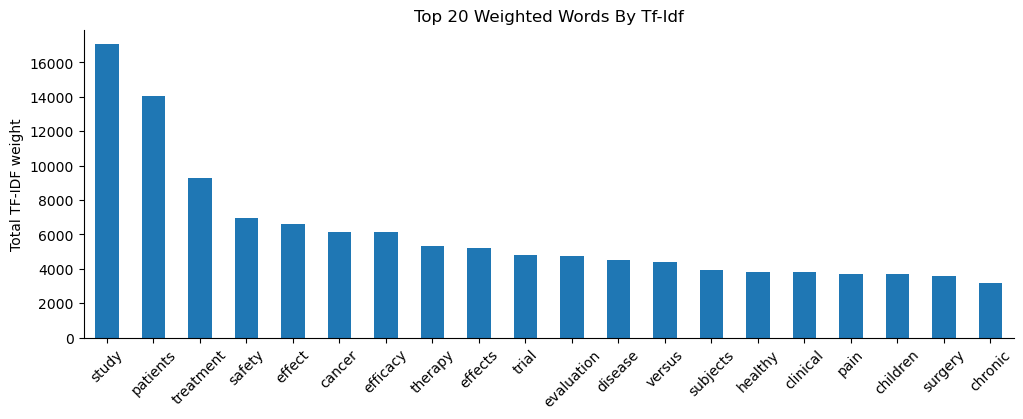

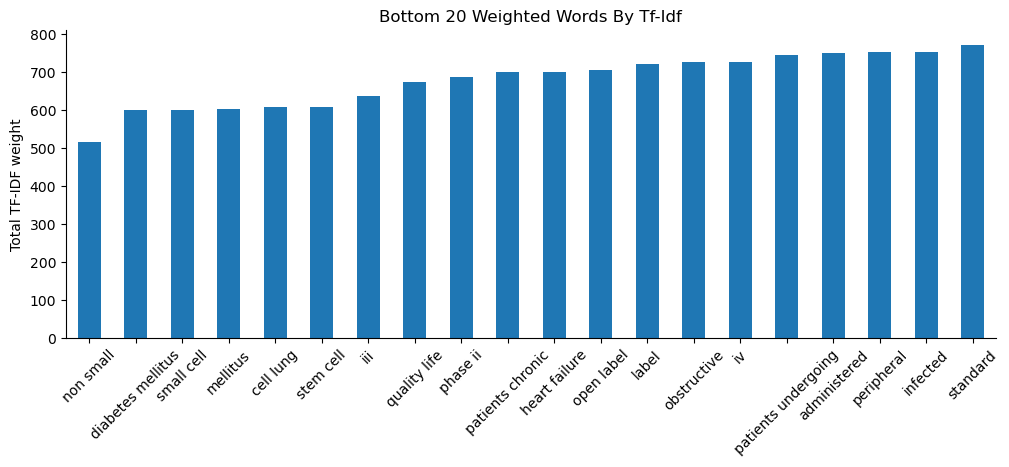

In [19]:
# first plot
top_counts = pd.DataFrame(
    {"counts": title_train_transform.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()
).sort_values("counts", ascending=False)

top_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Top 20 weighted words by TF-IDF".title())
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
sns.despine()
plt.show()



# second plot
bottom_counts = pd.DataFrame(
    {"counts": title_train_transform.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()
).sort_values("counts", ascending=True)

bottom_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Bottom 20 weighted words by TF-IDF".title())
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
sns.despine()
plt.show()

- The top 20 highest weighted words such as `study`, `patients`, `treatment`, etc. do not provide much meaningful value in terms of classifying the study and how it would affect trial terminations.
- However the bottom 20 weighted words are pretty significant such as `diabetes mellitus`, `stem cell`, `heart failure` etc.

To select more meaningful weighted words, we can use `max_df` to remove frequent words that add no meaning to the model such as `study`, ` patients`, `safety`, etc.
- we will set max_df = 7500 to exclude any words that appear in more than 7500 documents.

In [8]:
# Instantiate TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=250, ngram_range=(1,2), max_df=7500)

# Fit the vector
tfidf.fit(title_train)

# transform the train and test set
title_train_transform = tfidf.transform(title_train)
title_test_transform = tfidf.transform(title_test)

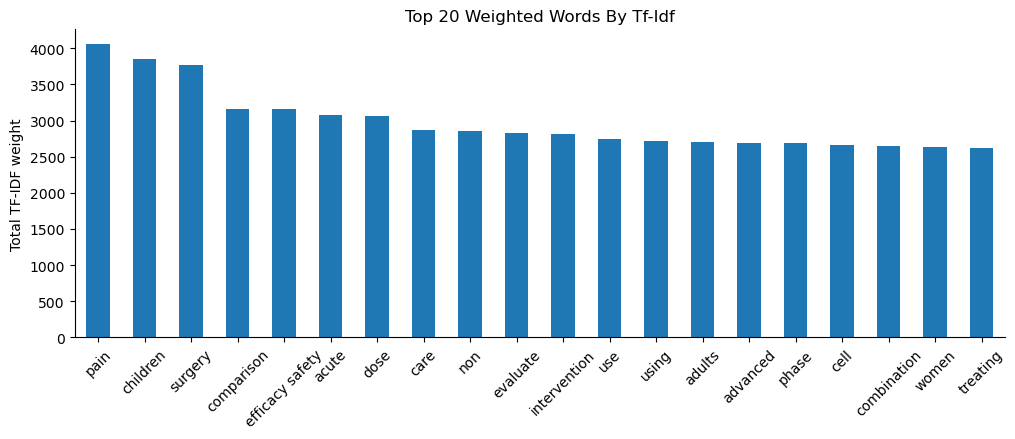

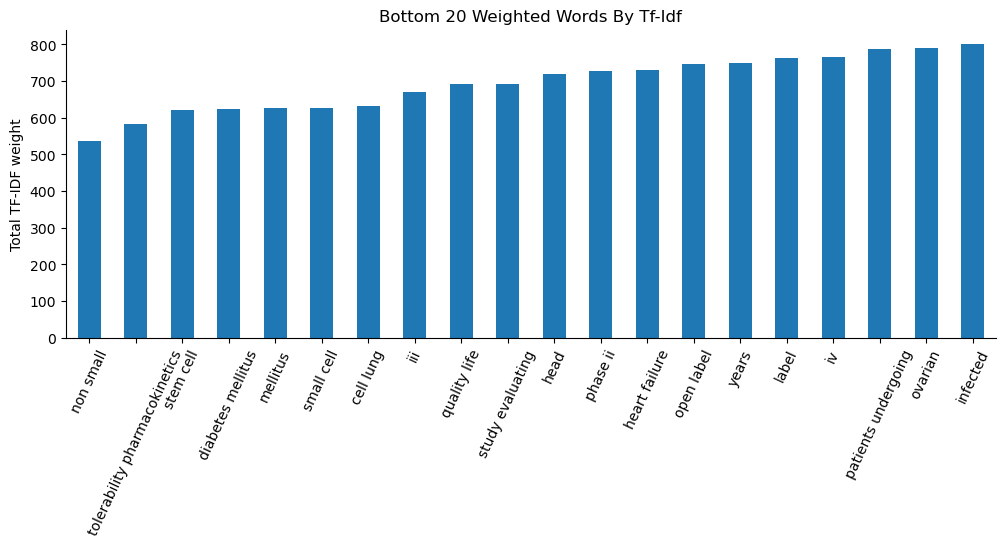

In [21]:
# first plot
top_counts = pd.DataFrame(
    {"counts": title_train_transform.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()
).sort_values("counts", ascending=False)

top_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Top 20 weighted words by TF-IDF".title())
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=45)
sns.despine()
plt.show()



# second plot
bottom_counts = pd.DataFrame(
    {"counts": title_train_transform.toarray().sum(axis=0)},
    index=tfidf.get_feature_names_out()
).sort_values("counts", ascending=True)

bottom_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Bottom 20 weighted words by TF-IDF".title())
plt.ylabel("Total TF-IDF weight")
plt.xticks(rotation=65)
sns.despine()
plt.show()

**Title data cleaning summary:**
1. Removed common stop words from the dataset.
2. Tokens or words that appear in more than 7500 documents are removed.
3. Maximum features or max number of tokens in a document has been limited to 250.
4. Added bigrams to the model.

Let's concatenate the sparse matrices back into the baseline model!
1. We need to add a prefix to the title words. (Title_)
2. Convert the sparse matrix into pandas dataframe
3. Concatenate dataframe to main dataset

In [9]:
# Add prefix Title_
title_col_name = ['Title_' + word for word in tfidf.get_feature_names_out()]

In [10]:
# convert sparse matrix into dataframe
# Source(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sparse.from_spmatrix.html)
title_df = pd.DataFrame.sparse.from_spmatrix(title_train_transform, columns = title_col_name).sparse.to_dense()
title_df.head()

,Title_19,Title_acid,Title_activity,Title_acute,Title_administered,Title_administration,Title_adolescents,Title_adult,Title_adults,Title_advanced,...,Title_use,Title_using,Title_vaccine,Title_vitamin,Title_volunteers,Title_vs,Title_weight,Title_women,Title_years,Title_young
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.420733,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
# Resetting indexes
X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)
title_df.reset_index(drop=True, inplace=True)

# Concatenating DataFrames
new_X_train = pd.concat([X_train, title_df], axis=1) #axis=1 makes sure it adds by column and not row
new_X_train.shape

(244088, 477)

The shape looks correct, now we need to do the same steps for the testing set.

In [12]:
# convert test text to dataframe
title_test_df = pd.DataFrame.sparse.from_spmatrix(title_test_transform, columns = title_col_name).sparse.to_dense()

# Resetting indexes
X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
title_test_df.reset_index(drop=True, inplace=True)

# Concatenating test dataframes
new_X_test = pd.concat([X_test, title_test_df], axis=1) #axis=1 makes sure it adds by column and not row
new_X_test.shape

(61022, 477)

Now we are ready to fit the `StandardScaler()` and the `Logistic Regression`

In [26]:
# instantiate the scaler
ss = StandardScaler()

# fit the scaler into the training set
ss.fit(new_X_train)

# transform the train and testing set
new_X_train_ss = ss.transform(new_X_train)
new_X_test_ss = ss.transform(new_X_test)

In [27]:
# instantiate logistic regression
logreg = LogisticRegression() 

# fit the model
logreg.fit(new_X_train_ss, y_train)

LogisticRegression()

In [28]:
print(f"Train score: {logreg.score(new_X_train_ss, y_train)}")
print(f"Test score: {logreg.score(new_X_test_ss, y_test)}")

Train score: 0.9079307462882239
Test score: 0.9073285044737963


**Note** that the scores did not change by much even after the `Title` text data was added to the model. Let's look at the evaluation metrics.

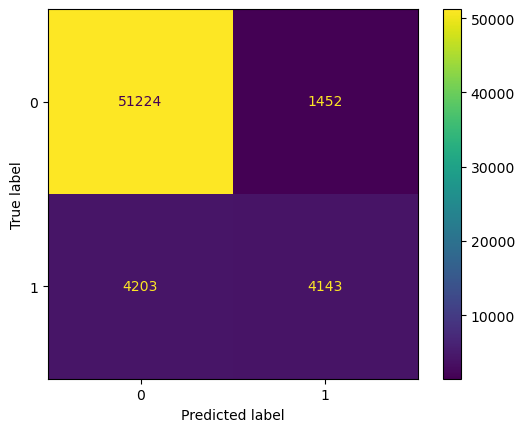

In [29]:
# Get class predictions
y_pred = logreg.predict(new_X_test_ss)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, new_X_test_ss, y_test)

We can still observe that the model fails immensely in the recall scores when looking at true terminated trials.

In [30]:
title_logreg_report = classification_report(y_test, y_pred)
print(title_logreg_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52676
           1       0.74      0.50      0.59      8346

    accuracy                           0.91     61022
   macro avg       0.83      0.73      0.77     61022
weighted avg       0.90      0.91      0.90     61022



We really need to address the data imbalance as the recall score is only 50%.

For now, let's look at the word coefficients to see which words give the best predictions for clinical trials.

In [31]:
# slice out title coeficients
title_matrix = logreg.coef_[0,227:]
title_matrix.shape

(250,)

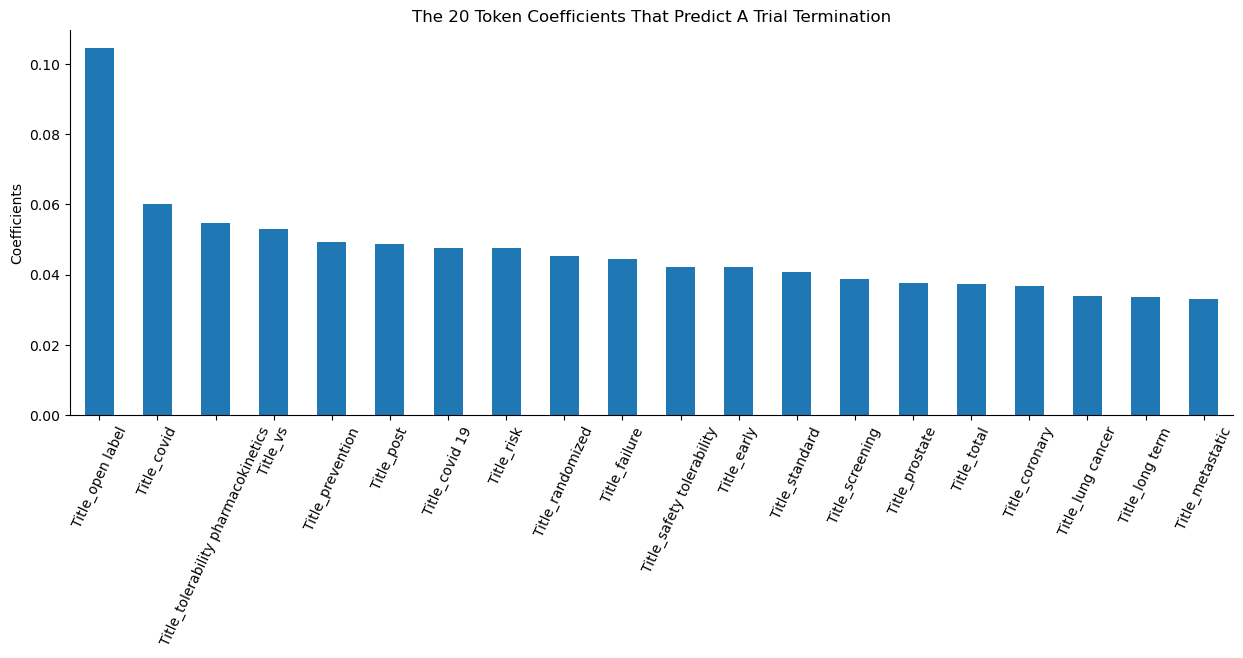

In [32]:
# Creating a dataframe to store the coefficients
top_coef = pd.DataFrame(
    {"coefficients": title_matrix},
    index=title_col_name
).sort_values("coefficients", ascending=False) # ascending = False will give us the top 20 coefficients that predict a positive sentiment

top_coef.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 Token coefficients that predict a trial termination".title())
plt.ylabel("Coefficients")
plt.xticks(rotation=65)
sns.despine()
plt.show()

Interesting to see that the title covid was the main driver for clinical trial terminations.

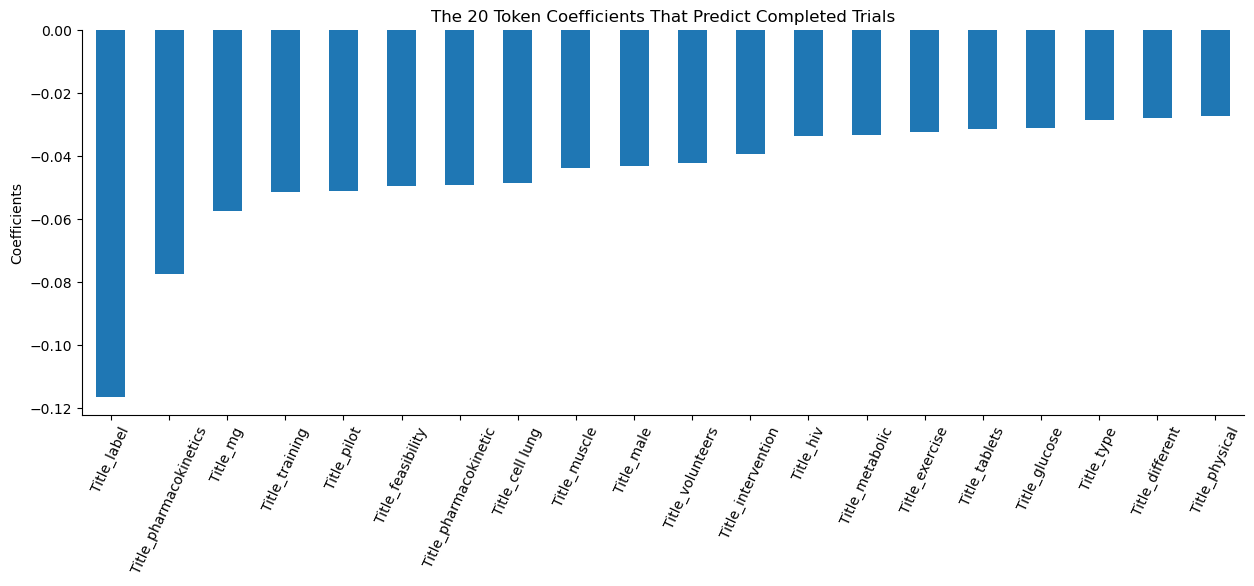

In [33]:
bottom_coef = pd.DataFrame(
    {"coefficients": title_matrix},
    index=title_col_name
).sort_values("coefficients", ascending=True)

bottom_coef.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("The 20 token coefficients that predict completed trials".title())
plt.ylabel("Coefficients")
plt.xticks(rotation=65)
sns.despine()
plt.show()

Pharmacokinetics have the least terminated trials.

Let's preprocess the Brief Summary Text data next:

#### Brief Summary

- Next is the `Brief Summary` column since it holds the bulk of the words in a study.
- We will use the **Bag of Words** vectorizer which will look at the token frequency per document.

In [13]:
# Setting variables
X_summary = text_df['Brief Summary']
y = text_df['Study Status']

In [14]:
# Splitting summary dataset
summary_train, summary_test, y_train, y_test = train_test_split(X_summary, y, test_size=0.2, random_state=12, stratify=y)

# check the shape
print(summary_train.shape, summary_test.shape, y_train.shape, y_test.shape)

(244088,) (61022,) (244088,) (61022,)


We will instantiate a **CountVectorizer()** with the following features:
- Remove stop_words such as 'the', 'is', 'he', 'them', etc.
- Setting a higher max_feature of 500 since there are a lot more words in the summary.
- Set ngram_range from 1 to 2 so we can look at words in sequence.
- Like the title data, we will add a max_df = 10000 which will remove words that occur in more than 10000 documents.
- Adding a min_df = 20 which will remove words that occur in less than 20 documents.

In [15]:
# Instantiate count vectorizer
bow = CountVectorizer(stop_words='english', max_features=500, ngram_range=(1,2), max_df=10000, min_df=20)

# Fit the vector
bow.fit(summary_train)

# transform the train and test set
summary_train_transform = bow.transform(summary_train)
summary_test_transform = bow.transform(summary_test)

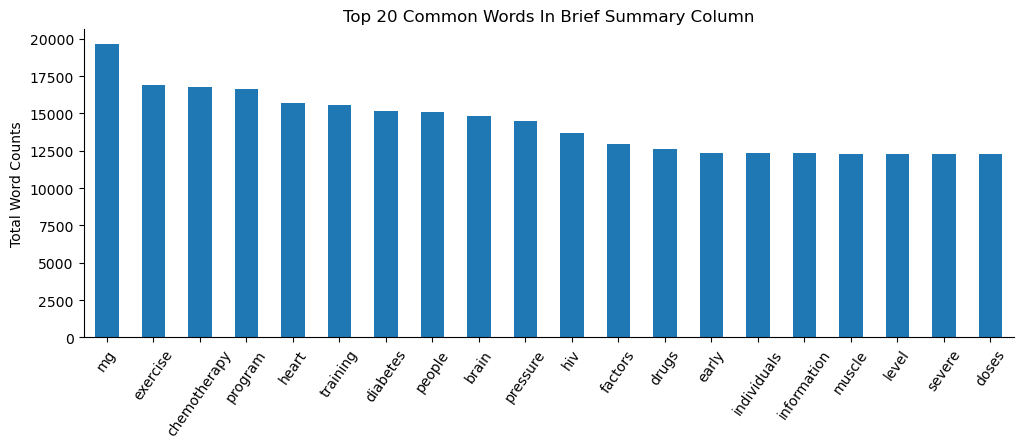

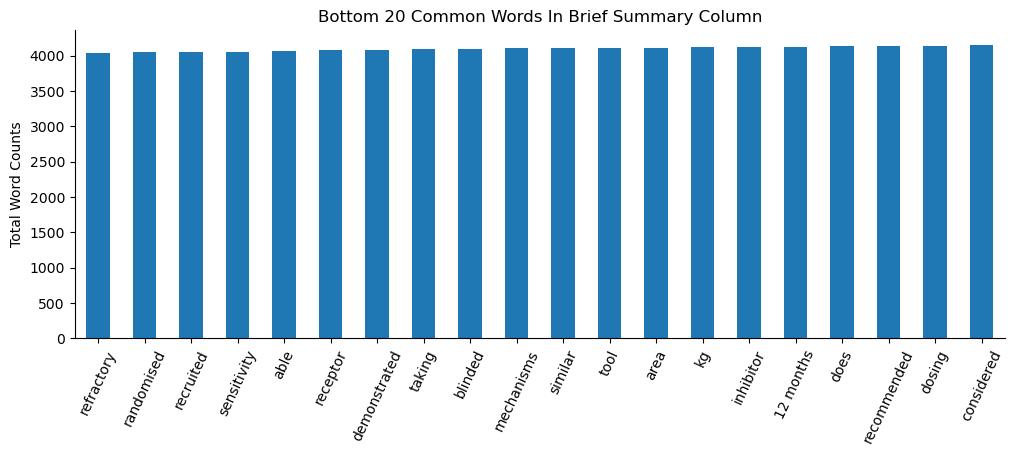

In [37]:
# first plot
top_counts = pd.DataFrame(
    {"counts": summary_train_transform.toarray().sum(axis=0)},
    index=bow.get_feature_names_out()
).sort_values("counts", ascending=False)

top_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Top 20 Common Words in Brief summary column".title())
plt.ylabel("Total Word Counts")
plt.xticks(rotation=55)
sns.despine()
plt.show()



# second plot
bottom_counts = pd.DataFrame(
    {"counts": summary_train_transform.toarray().sum(axis=0)},
    index=bow.get_feature_names_out()
).sort_values("counts", ascending=True)

bottom_counts.head(20).plot(kind="bar", legend=False, figsize=(12,4))
plt.title("Bottom 20 common words in brief summary column".title())
plt.ylabel("Total Word Counts")
plt.xticks(rotation=65)
sns.despine()
plt.show()

The words selected provide a lot of meaning into what the study contains such as `excercise`, `chemotherapy`, `diabetes`, `hiv` etc.

We can also add these columns to our logistic regression model.

In [16]:
# Add prefix Summary_
summary_col_name = ['Summary_' + word for word in bow.get_feature_names_out()]

In [17]:
# convert sparse matrix into dataframe
summary_df = pd.DataFrame.sparse.from_spmatrix(summary_train_transform, columns = summary_col_name).sparse.to_dense()
summary_df.head()

,Summary_100,Summary_12 months,Summary_14,Summary_15,Summary_18,Summary_19,Summary_20,Summary_24,Summary_25,Summary_30,...,Summary_volume,Summary_volunteers,Summary_vs,Summary_way,Summary_ways,Summary_weight,Summary_work,Summary_works,Summary_year,Summary_young
0,0,0,0,0,0,0,0,0,0,0,...,0,2,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [18]:
# Resetting index
summary_df.reset_index(drop=True, inplace=True)

# Concatenating DataFrames
new_X_train = pd.concat([new_X_train, summary_df], axis=1) #axis=1 makes sure it adds by column and not row
new_X_train.shape

(244088, 977)

Now for the testing set:

In [19]:
# convert test text to dataframe
summary_test_df = pd.DataFrame.sparse.from_spmatrix(summary_test_transform, columns = summary_col_name).sparse.to_dense()

# Resetting indexes
summary_test_df.reset_index(drop=True, inplace=True)

# Concatenating test dataframes
new_X_test = pd.concat([new_X_test, summary_test_df], axis=1) #axis=1 makes sure it adds by column and not row
new_X_test.shape

(61022, 977)

In [42]:
# instantiate the scaler
ss = StandardScaler()

# fit the scaler into the training set
ss.fit(new_X_train)

# transform the train and testing set
new_X_train_ss = ss.transform(new_X_train)
new_X_test_ss = ss.transform(new_X_test)

In [43]:
# instantiate logistic regression
logreg = LogisticRegression()

# fit the model
logreg.fit(new_X_train_ss, y_train)

LogisticRegression()

In [44]:
print(f"Train score: {logreg.score(new_X_train_ss, y_train)}")
print(f"Test score: {logreg.score(new_X_test_ss, y_test)}")

Train score: 0.9087910917374061
Test score: 0.9073940546032578


The train score improved slightly by 0.1% when the `Brief Summary` column was added. However, the data imbalance still seems to be the main issue. We will try upsampling and downsampling the two classes after we look at the coefficients.

Let's double check with the classification report:

In [45]:
# Get class predictions
y_pred = logreg.predict(new_X_test_ss)

summary_logreg_report = classification_report(y_test, y_pred)
print(summary_logreg_report)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52676
           1       0.74      0.49      0.59      8346

    accuracy                           0.91     61022
   macro avg       0.83      0.73      0.77     61022
weighted avg       0.90      0.91      0.90     61022



As expected, the recall and f1-scores for terminated trials has not changed by very much.

In [46]:
# slice out title coeficients
summary_matrix = logreg.coef_[0,477:]
summary_matrix.shape

(500,)

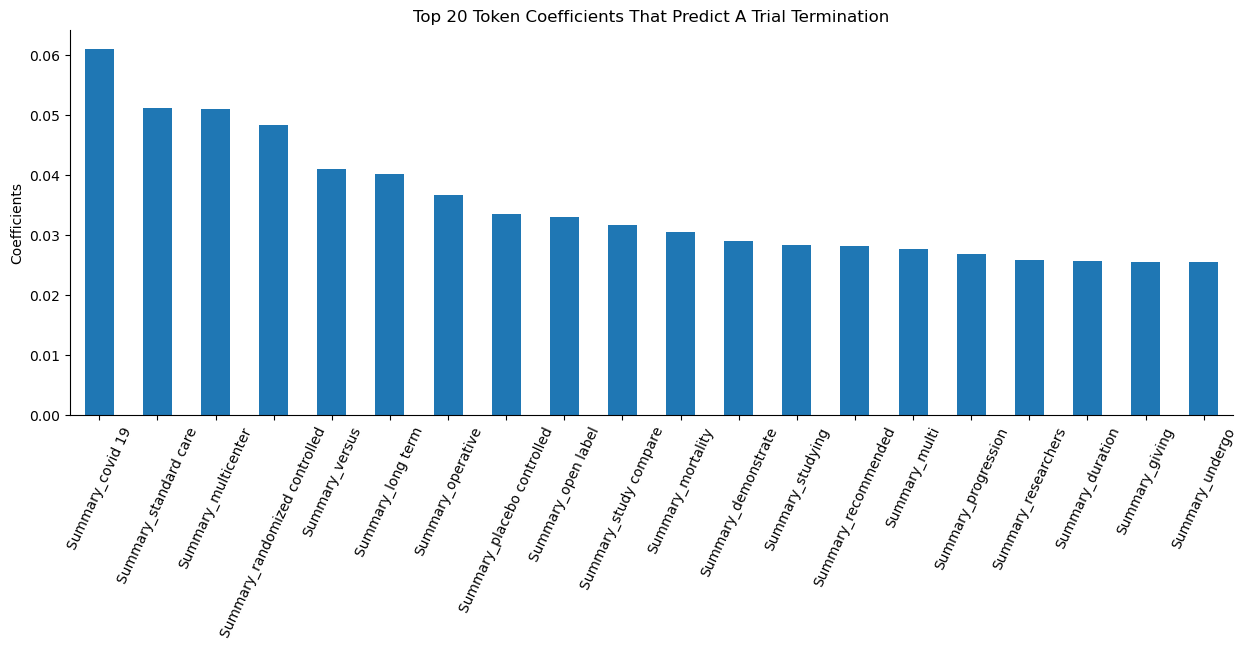

In [47]:
# Creating a dataframe to store the coefficients
top_coef = pd.DataFrame(
    {"coefficients": summary_matrix},
    index=summary_col_name
).sort_values("coefficients", ascending=False) # ascending = False will give us the top 20 coefficients that predict a positive sentiment

top_coef.head(20).plot(kind="bar", figsize=(15, 5), legend=False)
plt.title("Top 20 Token coefficients that predict a trial termination".title())
plt.ylabel("Coefficients")
plt.xticks(rotation=65)
sns.despine()
plt.show()

Interesting to note that `covid 19` has the highest coefficient in predicting trial terminations.

**Export train and test CSV files for future notebooks**

In [27]:
# Double check the shape
print(new_X_train.shape, y_train.shape, new_X_test.shape, y_test.shape)

(244088, 977) (244088,) (61022, 977) (61022,)


Training Set

In [31]:
# Resetting index of training set
new_X_train.reset_index(drop=True, inplace=True)
y_train.reset_index(drop=True, inplace=True)

# concatenate x and y train into training set
train_df = pd.concat([new_X_train, y_train], axis=1)
train_df.shape

(244088, 978)

Testing Set

In [32]:
# Resetting index of testing set
new_X_test.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)

# concatenate x and y test into testing set
test_df = pd.concat([new_X_test, y_test], axis=1)
test_df.shape

(61022, 978)

Export Train and Test CSVs

In [33]:
# Train
train_df.to_csv('train_set.csv')

# Test
test_df.to_csv('test_set.csv')

<a id = 'balance'></a>
### 3. Dealing With Class Imbalance

[back to table of contents](#toc)

---
First let's analyze the ratio between completed and terminated trials.

In [48]:
# number of completed trials
completed_trials = y_test[y_test == 0].count()

# number of terminated trials
terminated_trials = y_test[y_test == 1].count()

print(f'Completed trials = {completed_trials} and Terminated trials = {terminated_trials}')

Completed trials = 52676 and Terminated trials = 8346


In [49]:
# ratio between completed and terminated
completed_trials/terminated_trials

6.311526479750778

There are 6.3 times more completed than terminated trials.

#### Upsampling Using Class Weights
- We will multiply the terminated trials by a weight from 1 to 7 and see how the f1 and accuracy scores change.

In [50]:
weights = [1, 2, 3, 4, 5, 6, 7]
f1_scores = []
train_scores = []
test_scores = []

for weight in weights:
    logreg = LogisticRegression(class_weight={0:1, 1:weight})
    logreg.fit(new_X_train_ss, y_train)

    # Print class_weights
    print(f'Completed = 1, Terminated = {weight}')
    
    # Print accuracy score for train and test
    print(f"Train score: {logreg.score(new_X_train_ss, y_train)}")
    print(f"Test score: {logreg.score(new_X_test_ss, y_test)}")

    # Print Classification Report
    y_pred = logreg.predict(new_X_test_ss)
    upsample_logreg_report = classification_report(y_test, y_pred)
    print(upsample_logreg_report)

    # append scores
    f1_scores.append(f1_score(y_test, y_pred))
    train_scores.append(logreg.score(new_X_train_ss, y_train))
    test_scores.append(logreg.score(new_X_test_ss, y_test))
    
    print('--------------------------------------------------------')

Completed = 1, Terminated = 1
Train score: 0.9087910917374061
Test score: 0.9073940546032578
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52676
           1       0.74      0.49      0.59      8346

    accuracy                           0.91     61022
   macro avg       0.83      0.73      0.77     61022
weighted avg       0.90      0.91      0.90     61022

--------------------------------------------------------
Completed = 1, Terminated = 2
Train score: 0.9066566156468159
Test score: 0.9050178624102783
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     52676
           1       0.70      0.54      0.61      8346

    accuracy                           0.91     61022
   macro avg       0.81      0.75      0.78     61022
weighted avg       0.90      0.91      0.90     61022

--------------------------------------------------------
Completed = 1, Terminated = 3
Train score: 0.8

As the Terminated class becomes weighted higher, the precision score decreases and recall score increases. Note that the precision score decreases at a faster rate than the recall score, so the f1-score also decreases.

Let's visualize the graphs:

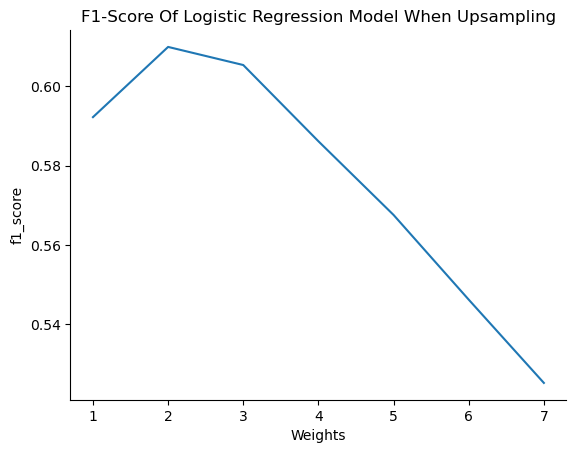

In [51]:
plt.figure()

sns.lineplot(x=weights, y=f1_scores)
plt.title('f1-score of Logistic Regression model when upsampling'.title())
plt.xlabel('Weights')
plt.ylabel('f1_score')

sns.despine()
plt.show()

The f1-score increased slightly when the class weight of terminated trials was 2 but then decreased linearly as the weights increased.

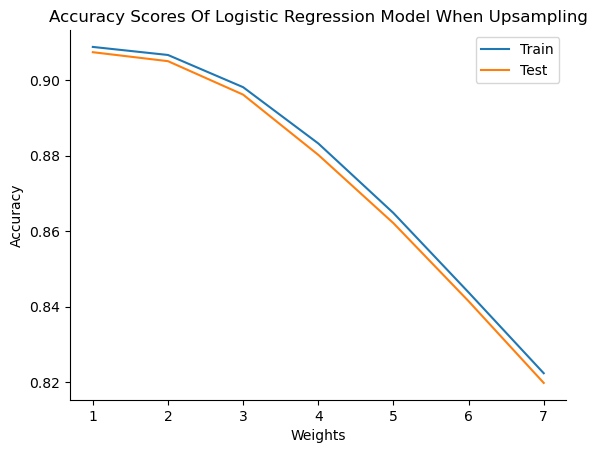

In [52]:
plt.figure()

sns.lineplot(x=weights, y=train_scores, label='Train')
sns.lineplot(x=weights, y=test_scores, label='Test')
plt.title('Accuracy Scores of Logistic Regression model when upsampling'.title())
plt.xlabel('Weights')
plt.ylabel('Accuracy')

sns.despine()
plt.show()

There doesn't seem to be any overfitting in the Logistic Regression model, by the accuracy is also going down as the weights of terminated class goes up.

#### Downsampling Completed Trials Using Class Weights
- We will divide the weight of the completed trials from a range of 1 to 7 to simulate downsampling.

In [53]:
weights = [1, 2, 3, 4, 5, 6, 7]
f1_scores = []
train_scores = []
test_scores = []

for weight in weights:
    logreg = LogisticRegression(class_weight={0:1/weight, 1:1})
    logreg.fit(new_X_train_ss, y_train)

    # Print class_weights
    print(f'Completed = {round(1/weight, 2)}, Terminated = 1')
    
    # Print accuracy score for train and test
    print(f"Train score: {logreg.score(new_X_train_ss, y_train)}")
    print(f"Test score: {logreg.score(new_X_test_ss, y_test)}")

    # Print Classification Report
    y_pred = logreg.predict(new_X_test_ss)
    upsample_logreg_report = classification_report(y_test, y_pred)
    print(upsample_logreg_report)

    # append scores
    f1_scores.append(f1_score(y_test, y_pred))
    train_scores.append(logreg.score(new_X_train_ss, y_train))
    test_scores.append(logreg.score(new_X_test_ss, y_test))
    
    print('--------------------------------------------------------')

Completed = 1.0, Terminated = 1
Train score: 0.9087910917374061
Test score: 0.9073940546032578
              precision    recall  f1-score   support

           0       0.92      0.97      0.95     52676
           1       0.74      0.49      0.59      8346

    accuracy                           0.91     61022
   macro avg       0.83      0.73      0.77     61022
weighted avg       0.90      0.91      0.90     61022

--------------------------------------------------------
Completed = 0.5, Terminated = 1
Train score: 0.9066607125299072
Test score: 0.9050014748779129
              precision    recall  f1-score   support

           0       0.93      0.96      0.95     52676
           1       0.70      0.54      0.61      8346

    accuracy                           0.91     61022
   macro avg       0.81      0.75      0.78     61022
weighted avg       0.90      0.91      0.90     61022

--------------------------------------------------------
Completed = 0.33, Terminated = 1
Train sco

The results are pretty similar to upsampling the terminated trials, however the recall scores of terminated trials are slightly higher when downsampling.

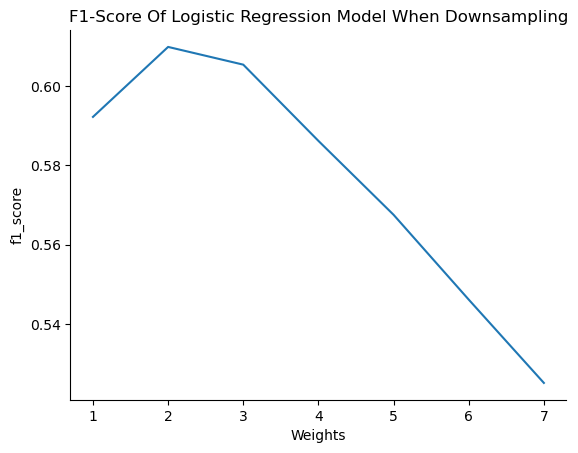

In [54]:
plt.figure()

sns.lineplot(x=weights, y=f1_scores)
plt.title('f1-score of Logistic Regression model when downsampling'.title())
plt.xlabel('Weights')
plt.ylabel('f1_score')

sns.despine()
plt.show()

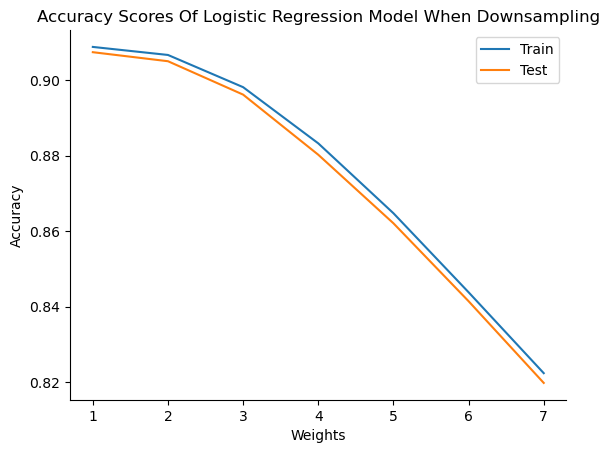

In [55]:
plt.figure()

sns.lineplot(x=weights, y=train_scores, label='Train')
sns.lineplot(x=weights, y=test_scores, label='Test')
plt.title('Accuracy Scores of Logistic Regression model when downsampling'.title())
plt.xlabel('Weights')
plt.ylabel('Accuracy')

sns.despine()
plt.show()

There doesn't seem to be a significant difference in accuracies between upsampling terminated and downsampling completed trials. Both f1 and accuracy scores start decreasing as the weights increase.

#### Synthetic Minority Oversampling Technique (SMOTE)

In [56]:
from imblearn.over_sampling import SMOTE

# instantiate SMOTE
smote = SMOTE(random_state=1)
             
# fit on unscaled training set
X_train_sm, y_train_sm = smote.fit_resample(new_X_train, y_train)

In [57]:
# sanity check
print(f'Before smote, completed trials = {y_train[y_train == 0].count()}')
print(f'Before smote, terminated trials = {y_train[y_train == 1].count()}')
print('-----------------------------------------------')
print(f'After smote, completed trials = {y_train_sm[y_train_sm == 0].count()}')
print(f'After smote, terminated trials = {y_train_sm[y_train_sm == 1].count()}')

Before smote, completed trials = 210704
Before smote, terminated trials = 33384
-----------------------------------------------
After smote, completed trials = 210704
After smote, terminated trials = 210704


**SMOTE** increased the number of terminated trials to match the number of completed trials.

In [58]:
# instantiate the scaler
ss = StandardScaler()

# fit the scaler into the training set
ss.fit(X_train_sm)

# transform the train and testing set
X_train_sm = ss.transform(X_train_sm)
X_test_sm = ss.transform(new_X_test)

In [59]:
# instantiate logistic regression
logreg = LogisticRegression()

# fit the model
logreg.fit(X_train_sm, y_train_sm)

LogisticRegression()

In [60]:
print(f"Train score: {logreg.score(X_train_sm, y_train_sm)}")
print(f"Test score: {logreg.score(X_test_sm, y_test)}")

Train score: 0.9192445326144734
Test score: 0.8899904952312281


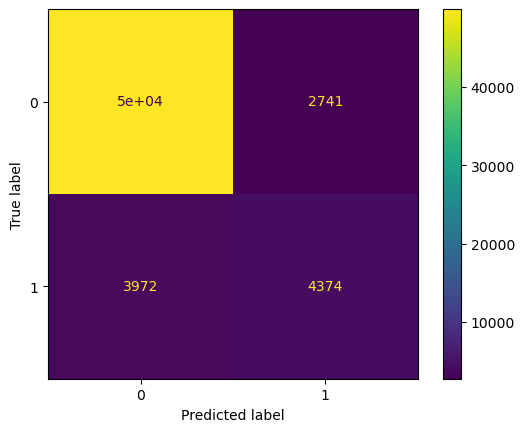

In [61]:
# Get class predictions
y_pred = logreg.predict(X_test_sm)

# Confusion matrix
ConfusionMatrixDisplay.from_estimator(logreg, X_test_sm, y_test)

In [62]:
smote_logreg_report = classification_report(y_test, y_pred)
print(smote_logreg_report)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     52676
           1       0.61      0.52      0.57      8346

    accuracy                           0.89     61022
   macro avg       0.77      0.74      0.75     61022
weighted avg       0.88      0.89      0.89     61022



SMOTE does not seem to be working well for our model as the f1-score and accuracies have decreased significantly.

<a id = 'sum'></a>
## 4. Summary & Next Steps

[back to table of contents](#toc)

---

**Baseline Model**
- The accuracy scores are really good for both train and testing sets at 90.7% for the logistic regression model.
- However, the recall and f1-scores are very low due to the severe data imbalance between completed and terminated trials.

**Text Processing**
- Found that Covid titles had the biggest impact for trial terminations based on the logistic regression model.
- Heart failures in the brief summary had the biggest impact for trial terminations.
- Adding text data did not change the recall and f1-scores.

**Next Steps**
- We will need to perform random desampling of the completed trials to balance out the data more.
- We can use ensemble learning to combine multiple models such as random forest classification to get better predictions.
- Using NLP word embedding and neural networks as well.  